## 1.1 Getting Data

Let us consider a public database, called “Adult” dataset hosted on the UCI’s Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Adult), that contains approximately 32.000 observations about different financial parameters of US population.

### 1.2 Data preparation

One of the reasons we are using a general-purpose language such as Python rather than a stats language like R is that for many projects the *hard* part is preparing the data, not doing the analysis.

The most common steps are:

1. **Getting the data**. Data can be directly read from a file or it might be necessary to scrap the web.
2. **Parsing the data**.  Of course, this depends on what format it is in: plain text, fixed columns, CSV, XML, HTML, etc.
3. **Cleaning the data**.  Survey responses and other data files are almost always incomplete.  Sometimes there are multiple codes for things like, *not asked*, *did not know*, and *declined to answer*. And there are almost always errors. A simple strategy is to remove or ignore incomplete records.
4. **Building data structures**. Once you read the data, you usually want to store it in a data structure that lends itself to the analysis you want to do.

If the data fits into memory, building a data structure is usually the way to go.   If not, you could build a database, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they are like dictionaries.

Let us read the dataset:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data= pd.read_csv('adult.csv')
#print(data)'
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 1.3 Importing data as a pandas DataFrame

In [3]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
data.shape

(48842, 15)

Let's count the number of items per country:


In [5]:
counts = data.groupby('native-country').size()

print(counts)
# also: 
#data.outcome.value_counts()

native-country
?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua    

In [6]:
counts = data.groupby('age').size() # grouping by age
print(counts) 

age
17     595
18     862
19    1053
20    1113
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Length: 74, dtype: int64


In [7]:
ml = data[(data.gender == 'Male')] # grouping by sex
ml.shape

(32650, 15)

In [8]:
ml1 = data[(data.gender == 'Male')&(data.income=='>50K')]
ml1.head()
#ml1.shape

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K


Let's separate male from female according to the income. 

In [9]:
fm =data[(data.gender == 'Female')]
fm.shape

(16192, 15)

In [10]:
fm1 =data[(data.gender == 'Female')&(data.income=='>50K')]
fm1.shape

(1769, 15)

In [11]:
df1=data[(data.income=='>50K')]

print('The rate of people with high income is: ', int(len(df1)/float(len(data))*100), '%.')
print('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.')
print('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.')

The rate of people with high income is:  23 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


### 1.4 Data Cleaning

The most common steps are:

+ **Sample the data**. If the amount of raw data is huge, processing all of them may require an extensive amount of processing power which may not be practical.  In this case, it is quite common to sample the input data to reduce the size of data that need to be processed.

+ **Impute missing data**. It is quite common that some of the input records are incomplete in the sense that certain fields are missing or have input error.  In a typical tabular data format, we need to validate each record contains the same number of fields and each field contains the data type we expect. In case the record has some fields missing, we have the following choices: 
<small>
* (a) Discard the whole record if it is incomplete; 
* (b) Infer the missing value based on the data from other records.  A common approach is to fill the missing data with the average, or the median.
<small>

In [12]:
# check total nan values in the dataset

for column in data.columns:
    print(column + ":", sum(data[column] == "?"))

age: 0
workclass: 2799
fnlwgt: 0
education: 0
educational-num: 0
marital-status: 0
occupation: 2809
relationship: 0
race: 0
gender: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 857
income: 0


In [13]:
import numpy as np
import pandas as pd

# Sample the data into n equal parts. After sampling, replace "?" with NaN
data = data.sample(frac=0.5)
data = data.replace('?', np.nan)

# Replace NaN with mean for numerical columns where "?" was replaced
for column in data.columns:
    if data[column].dtype != 'object':  # Check if column is numerical
        data[column] = pd.to_numeric(data[column])  # Convert to numeric
        mean_value = data[column].mean()
        data[column] = data[column].fillna(mean_value)

data.head(100)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
42150,35,Private,178948,Masters,14,Never-married,Prof-specialty,Unmarried,White,Female,0,0,32,United-States,<=50K
16207,18,Private,78181,Some-college,10,Never-married,Other-service,Other-relative,White,Female,0,0,40,United-States,<=50K
34758,30,Private,109282,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
16442,25,Private,252752,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
2481,21,Self-emp-not-inc,328906,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,4865,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,58,Self-emp-inc,154537,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States,>50K
27253,37,Private,127961,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
22173,21,Private,192572,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,45,United-States,<=50K
9253,45,Private,382242,Bachelors,13,Never-married,Adm-clerical,Unmarried,White,Female,0,0,30,NaN,<=50K


In [14]:
# count total "?" in each column and display each columns total nulls, use for loops and if else

for column in data.columns:
    print(column + ":", sum(data[column] == "?"))


age: 0
workclass: 0
fnlwgt: 0
education: 0
educational-num: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
gender: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 0
income: 0


In [339]:

# replace "?" in any categorical column with median, use for loop

# for column in data.columns:
#     if data[column].dtype == 'object':
#         data[column] = data[column].replace('?', data[column].mode()[0])

# # check if there are any "?" left in the dataset

# for column in data.columns:
#     print(column + ":", sum(data[column] == "?"))

+ **Normalize numeric value**. Normalize data is about transforming numeric data into a uniform range.

In [19]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

# Min-Max scaling
data_normalized = (data[numeric_columns] - data[numeric_columns].min()) / (data[numeric_columns].max() - data[numeric_columns].min())

# Display the normalized data
print(data_normalized.head())

            age    fnlwgt  educational-num  capital-gain  capital-loss  \
42150  0.246575  0.113190         0.866667       0.00000           0.0   
16207  0.013699  0.044754         0.600000       0.00000           0.0   
34758  0.178082  0.065876         0.600000       0.00000           0.0   
16442  0.109589  0.163314         0.533333       0.00000           0.0   
2481   0.054795  0.215034         0.533333       0.04865           0.0   

       hours-per-week  
42150        0.316327  
16207        0.397959  
34758        0.193878  
16442        0.397959  
2481         0.346939  


+ **Reduce dimensionality**. High dimensionality can be a problem for some machine learning methods.  There are two ways to reduce the number of input features.  One is about $removing$ $irrelevant$ input variables, another one is about $removing$ $redundant$ input variables.
+ **Add derived features**. In some cases, we may need to compute additional attributes from existing attributes (f.e. converting a geo-location to a zip code, or converting the age to an age group).
+ **Discretize numeric value into categories**. Discretize data is about cutting a continuous value into ranges and assigning the numeric with the corresponding bucket of the range it falls on.  For numeric attribute, a common way to generalize it is to discretize it into ranges, which can be either constant width (variable height/frequency) or variable width (constant height).
+ **Binarize categorical attributes**. Certain machine learning models only take binary input (or numeric input).  In this case, we need to convert categorical attribute into multiple binary attributes, while each binary attribute corresponds to a particular value of the category. 

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # You can specify the number of components
data_reduced = pca.fit_transform(data_normalized)

# Create a DataFrame with reduced dimensions
data_reduced_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])

# Display the reduced data
print(data_reduced_df.head())

        PC1       PC2
0  0.007287 -0.243531
1 -0.270714 -0.072809
2 -0.139056  0.009809
3 -0.200344  0.017669
4 -0.258408  0.009521


In [20]:
data['zip_code'] = data['geo_location'].apply(lambda x: get_zip_code(x))  # Replace 'get_zip_code' with your function

def get_age_group(age):
    if age < 18:
        return 'Under 18'
    elif age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50 and above'

data['age_group'] = data['age'].apply(get_age_group)

# Display the DataFrame with derived features
print(data.head())

KeyError: 'geo_location'

+ **Select, combine, aggregate data**. Designing the form of training data is the most important part of the whole predictive modeling exercise because the accuracy largely depends on whether the input features are structured in an appropriate form that provide strong signals to the learning algorithm. Rather than using the raw data as it is, it is quite common that multiple pieces of raw data need to be combined together, or aggregating multiple raw data records along some dimensions.

## 2 Exploratory Data Analysis.

### 2.1 Summarizing the data: 
#### 2.1.1 Sample Mean 

If you have a sample of $n$ values, $x_i$, the **sample mean** is the sum of the values divided by the number of values:

$$ \mu = \frac{1}{n} \sum_i x_i$$

The **mean** is the most basic and important summary statistic. It describes the central tendency of a sample. 

There is a small difference!

In [340]:
print('The average age of men is: ', ml['age'].mean(), '.')
print('The average age of women is: ', fm['age'].mean(), '.')

The average age of men is:  39.49439509954058 .
The average age of women is:  36.92798913043478 .


This difference in sample means can be considered a first evidence of our hypothesis!


**Comment: ** *Later, we will work with both concepts: the population mean and the sample mean. Do not confuse them! Remember, the first one is the mean of samples taken from the population and the second one is the mean of the whole population.*

In [341]:
print('The average age of high-income men is: ', ml1['age'].mean(), '.') 
print('The average age of high-income women is: ', fm1['age'].mean(), '.')

The average age of high-income men is:  44.64186327888687 .
The average age of high-income women is:  42.219332956472584 .


#### 2.1.2 Sample Variance

Usually, mean is not a sufficient descriptor of the data, we can do a little better with two numbers: mean and **variance**:

$$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

**Variance** $\sigma^2$ describes the *spread* of data. The term $(x_i - \mu)$ is called the *deviation from the mean*, so variance is the mean squared deviation.

The square root of variance, $\sigma$, is called the **standard deviation**. We define standard deviation because variance is hard to interpret (in the case the units are grams, the variance is in grams squared). Let's get the basic statistics for our example data:


In [342]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print('Statistics of age for men: mean:', ml_mu, 'var:', ml_var, 'std:', ml_std)
print('Statistics of age for women: mean:', fm_mu, 'var:', fm_var, 'std:', fm_std)

Statistics of age for men: mean: 39.49439509954058 var: 179.90454452826393 std: 13.412849977848255
Statistics of age for women: mean: 36.92798913043478 var: 199.866718258666 std: 14.13742261724767


In [343]:
ml_mu_hr = ml['hours-per-week'].mean()
fm_mu_hr = fm['hours-per-week'].mean()
ml_var_hr = ml['hours-per-week'].var()
fm_var_hr = fm['hours-per-week'].var()
ml_std_hr = ml['hours-per-week'].std()
fm_std_hr = fm['hours-per-week'].std()
print('Statistics of hours per week for men: mu:', ml_mu_hr, 'var:', ml_var_hr, 'std:', ml_std_hr)
print('Statistics  of hours per week for women: mu:', fm_mu_hr, 'var:', fm_var_hr, 'std:', fm_std_hr)

Statistics of hours per week for men: mu: 42.41684532924962 var: 146.89542512998221 std: 12.120042290767067
Statistics  of hours per week for women: mu: 36.40069169960474 var: 142.77538831776135 std: 11.948865566143146


In [344]:
data.shape

(24421, 15)

In [345]:
filtered_data = data.loc[ ((data.age>30) & (data.age<40))  &  (data.income == '>50K')  &  (data.gender=='Male') ,:]    
filtered_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
40269,33,Private,296538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K
41782,38,State-gov,321943,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
1556,33,State-gov,150688,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
13930,35,Private,211494,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,8614,0,40,NaN,>50K
33612,39,Private,184801,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


In [346]:
print("The mean of filtered data is: ",filtered_data.mean())
print("The variance of filtered data is: ",filtered_data.var())
print("The std of filtered data is: ",filtered_data.std())
print("The dimensions of the filtered data is: ",filtered_data.shape)

The mean of filtered data is:  age                    35.394303
fnlwgt             196808.092204
educational-num        11.652924
capital-gain         3098.064468
capital-loss          184.457271
hours-per-week         47.793853
dtype: float64
The variance of filtered data is:  age                6.351535e+00
fnlwgt             1.251538e+10
educational-num    5.143514e+00
capital-gain       1.419355e+08
capital-loss       3.298456e+05
hours-per-week     9.799273e+01
dtype: float64
The std of filtered data is:  age                     2.520225
fnlwgt             111872.138631
educational-num         2.267932
capital-gain        11913.666816
capital-loss          574.321865
hours-per-week          9.899128
dtype: float64
The dimensions of the filtered data is:  (1334, 15)


C:\Users\Hamza\AppData\Local\Temp\ipykernel_16004\2572213570.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("The mean of filtered data is: ",filtered_data.mean())
C:\Users\Hamza\AppData\Local\Temp\ipykernel_16004\2572213570.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("The variance of filtered data is: ",filtered_data.var())
C:\Users\Hamza\AppData\Local\Temp\ipykernel_16004\2572213570.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("The std of filtered

#### 2.1.3 Sample Median

The statistical median is an order statistic that gives the *middle* value of a sample. It is a value more robust to ouliers.

In [347]:
ml_median= ml['age'].median()
fm_median= fm['age'].median()
print("Median age per men and women: ", ml_median, fm_median)

ml_median_age= ml1['age'].median()
fm_median_age= fm1['age'].median()
print("Median age per men and women with high-income: ", ml_median_age, fm_median_age)


Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


In [348]:
ml_median_hr= ml['hours-per-week'].median()
fm_median_hr= fm['hours-per-week'].median()
print("Median hours per week per men and women: ", ml_median_hr, fm_median_hr)

Median hours per week per men and women:  40.0 40.0


#### 2.1.4 Summarizing the data: Quantiles & Percentiles

Order the sample $\{ x_i \}$, then find $x_p$ so that it divides the data into two parts where:

+ a fraction $p$ of the data values are less than or equal to $x_p$ and
+ the remaining fraction $(1 − p)$ are greater than $x_p$.

That value $x_p$ is the pth-quantile, or 100×pth percentile.

**5-number summary**: $x_{min}, Q_1, Q_2, Q_3, x_{max}$, where $Q_1$ is the 25×pth percentile,
$Q_2$ is the 50×pth percentile and $Q_3$ is the 75×pth percentile.

In [349]:
quanti= ml['age'].quantile([0.25, 0.50, 0.75])
quanti

0.25    29.0
0.50    38.0
0.75    48.0
Name: age, dtype: float64

### 2.2 Histogram

The most common representation of a distribution is a **histogram**, which is a graph that shows the frequency of each value. Let us visualize the histogram for the age of the male and female populations in our example: 

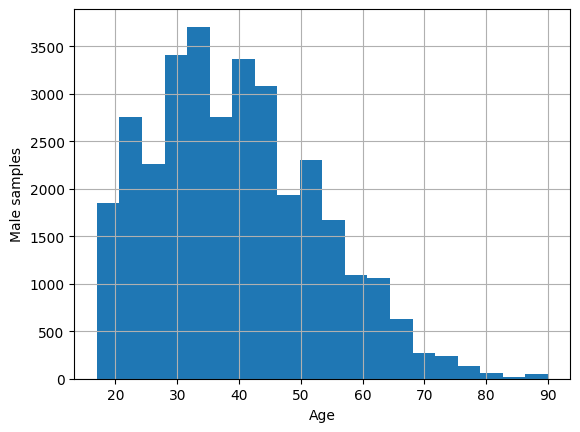

In [350]:
import matplotlib.pyplot as plt
ml_age=ml['age']
ml_age.hist(histtype='stepfilled', bins=20)

plt.xlabel('Age')
plt.ylabel('Male samples')
plt.show()

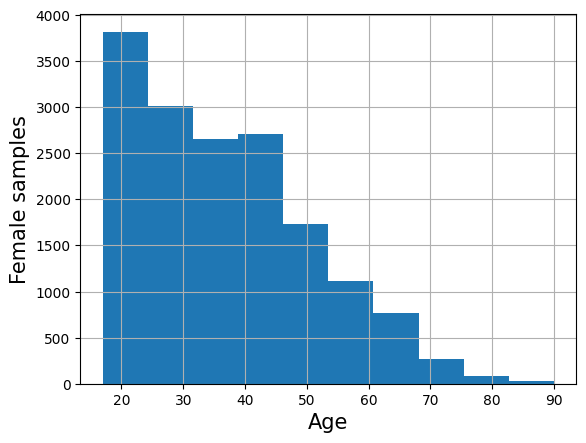

In [351]:
fm_age=fm['age']

fm_age.hist(histtype='stepfilled', bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Female samples',fontsize=15)
plt.show()

In [352]:
import scipy.stats as stats

## 2.4 Outliers

**Ouliers** are data samples with a value that is far from the central tendency.

We can find outliers by:

+ Computing samples that are *far* from the median.
+ Computing samples whose value *exceeds the mean* by 2 or 3 standard deviations.

This expression will return a series of boolean values that you can then index the series by:

In [353]:
data['age'].median()

37.0

Let's see how many outliers we can detect in our example:

In [354]:
filter_datai= data[(data.income == '>50K') & (data['age'] < data['age'].median() - 15)]
filter_datai

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
10535,21,Private,186087,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K
3163,21,Private,145964,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,>50K
29128,21,Private,548303,HS-grad,9,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,Mexico,>50K
39191,19,NaN,200790,12th,8,Married-civ-spouse,NaN,Other-relative,White,Female,15024,0,40,United-States,>50K
24022,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K


In [355]:
len(filter_datai)

5

In [356]:
len(data[(data.income == '>50K') & (data['age'] > data['age'].median() + 35)])

50

If we think that outliers correspond to errors, an option is to trim the data by discarting the highest and lowest values.

In [357]:
df2 = data.drop(data.index[(data.income=='>50K') & (data['age']>data['age'].median() + 35) & (data['age'] > data['age'].median() -15)])
df2.shape

(24371, 15)

In [358]:
ml1_age=ml1['age']
fm1_age=fm1['age']

ml2_age = ml1_age.drop(ml1_age.index[(ml1_age > data['age'].median() + 35) & (ml1_age > data['age'].median() - 15)])
fm2_age = fm1_age.drop(fm1_age.index[(fm1_age > data['age'].median() + 35) & (fm1_age > data['age'].median() - 15)])

In [359]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
# Computing the mean, std, median, min and max for the high-income male population
print("Men statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", ml2_age.min(), "Max:", ml2_age.max())

Men statistics: Mean: 44.33736901007224 Std: 10.062024196364517 Median: 44.0 Min: 19 Max: 72


In [360]:
mu3ml = fm2_age.mean()
std3ml = fm2_age.std()
md3ml = fm2_age.median()
# Computing the mean, std, median, min and max for the high-income female population
print("Women statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", fm2_age.min(), "Max:", fm2_age.max())

Women statistics: Mean: 44.33736901007224 Std: 10.062024196364517 Median: 44.0 Min: 19 Max: 72


### 5. Main reference
[1] *Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.
http://www.greenteapress.com/thinkstats/

[2] Anscombe's quartet, https://en.wikipedia.org/wiki/Anscombe%27s_quartet